see https://duckdb.org/docs/guides/python/jupyter.html

In [1]:
import duckdb
import pandas as pd

%load_ext sql
conn = duckdb.connect()
%sql conn --alias duckdb

Matplotlib is building the font cache; this may take a moment.


Deploy Dash apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


In [2]:
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

In [3]:
%sql SELECT 'Off and flying!' AS a_duckdb_column;

,a_duckdb_column
0,Off and flying!


In [4]:
%%sql
SELECT
    schema_name,
    function_name
FROM duckdb_functions()
ORDER BY ALL DESC
LIMIT 5;

,schema_name,function_name
0,pg_catalog,shobj_description
1,pg_catalog,shobj_description
2,pg_catalog,shobj_description
3,pg_catalog,pg_typeof
4,pg_catalog,pg_typeof


In [5]:
%%sql
INSTALL httpfs;
LOAD httpfs;

,Success


CatalogException: Catalog Error: Table with name cloudfront does not exist!
Did you mean "information_schema.columns"?
LINE 6:     FROM "https://d37ci6vzurychx"."cloudfront"
                 ^

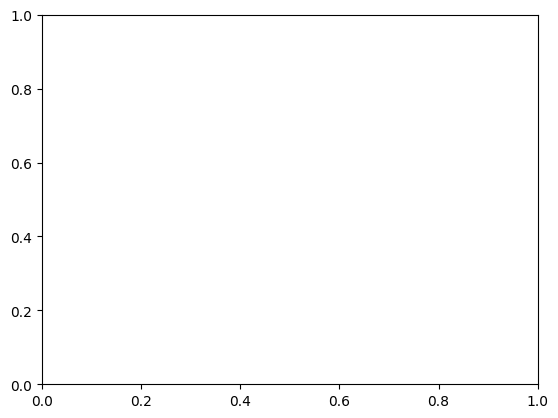

In [6]:
%sqlplot boxplot --table https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet --column trip_distance

In [7]:
%%sql --save short_trips --no-execute
SELECT *
FROM 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet'
WHERE trip_distance < 6.3

Skipping execution...

<Axes: title={'center': "'trip_distance' from 'short_trips'"}, xlabel='trip_distance', ylabel='Count'>

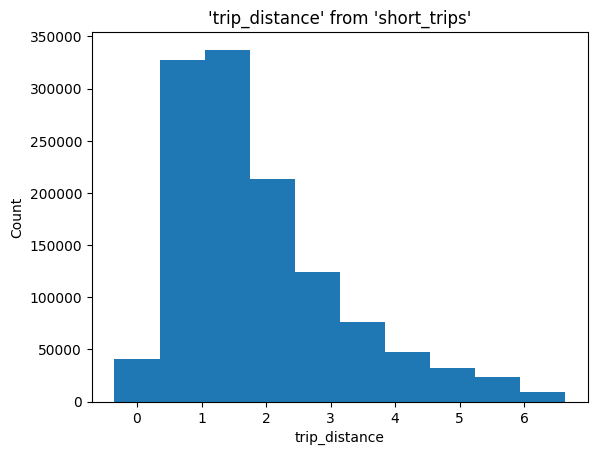

In [8]:
%sqlplot histogram --table short_trips --column trip_distance --bins 10 --with short_trips